In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
df =pd.read_csv("C:\\Users\\Dell\\Downloads\\candy-data.csv")

In [17]:
df.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [12]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [14]:
df.isnull().sum()/len(df)

competitorname      0.0
chocolate           0.0
fruity              0.0
caramel             0.0
peanutyalmondy      0.0
nougat              0.0
crispedricewafer    0.0
hard                0.0
bar                 0.0
pluribus            0.0
sugarpercent        0.0
pricepercent        0.0
winpercent          0.0
dtype: float64

We have a total of 12 variables that describe a chocolate. 9 of them are categorical and the rest, i.e. 3 are numerical variables.

1.chocolate: Does it contain chocolate?
2.fruity: Is it fruit flavored?
3.caramel: Is there caramel in the candy?
4.peanutalmondy: Does it contain peanuts, peanut butter or almonds?
5.nougat: Does it contain nougat?
6.crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
6.hard: Is it a hard candy?
7.bar: Is it a candy bar?
8.pluribus: Is it one of many candies in a bag or box?
9.sugarpercent: The percentile of sugar it falls under within the data set.
10.pricepercent: The unit price percentile compared to the rest of the set.
11.winpercent: The overall win percentage according to 269,000 matchups.

In [22]:
df['competitorname']=df["competitorname"].str.replace('Õ', "'")
#special char apperrs in data 

__if you want to know top 5 candy with suger percent 

In [29]:
list(df.sort_values(by=['sugarpercent'],ascending=False)['competitorname'].head())

["Reese's stuffed with pieces",
 'Sugar Babies',
 'Milky Way Simply Caramel',
 'Skittles wildberry',
 'Skittles original']

__if you want to know top 5 candy with wine  percent

In [30]:
list(df.sort_values(by=['winpercent'],ascending=False)['competitorname'].head())

["Reese's Peanut Butter cup",
 "Reese's Miniatures",
 'Twix',
 'Kit Kat',
 'Snickers']

__I want to know if the is a relation between the features

Text(0, 0.5, 'wine_percent')

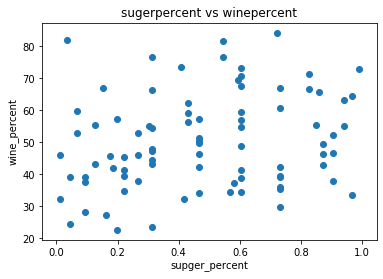

In [32]:
#1- suger percent and wine percent 
plt.scatter(df['sugarpercent'],df['winpercent'])
plt.title("sugerpercent vs winepercent")
plt.xlabel('supger_percent')
plt.ylabel('wine_percent')
#the scatter plot show that there is know relation between between suger percent and wine_percent 

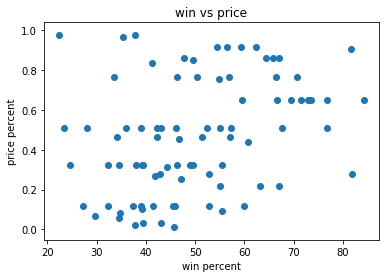

In [44]:
plt.scatter(df['winpercent'],df['pricepercent'])
plt.title("win vs price")
plt.ylabel('price percent')
plt.xlabel('win percent')
plt.show()
#no relation 

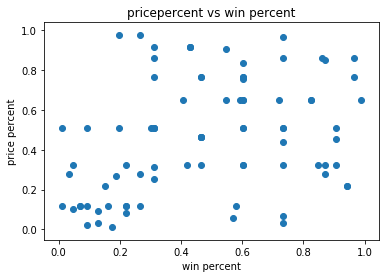

In [45]:
plt.scatter(df['sugarpercent'],df['pricepercent'])
plt.title("pricepercent vs win percent")
plt.ylabel('price percent')
plt.xlabel('win percent')
plt.show()
#the scatter shows that there is no realtion 

it is time to get some number to represent the previous scatter.
so i will use the corr() function to get the function between between the previous features 

In [41]:
df[['pricepercent','sugarpercent','winpercent']].corr()

,pricepercent,sugarpercent,winpercent
pricepercent,1.000000,0.329706,0.345325
sugarpercent,0.329706,1.000000,0.229151
winpercent,0.345325,0.229151,1.000000


In [46]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [56]:
y=df['chocolate']
x=df.iloc[:,2:13]
x

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...
80,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


i will modifiy thw scale of wine perecrt as it is bigger than 
the scale of othr features.

In [60]:
x.winrcent=x.winpercent/100.
x.head(3)


,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0,0.732,0.860,0.669717
1,0,0,0,1,0,0,1,0,0.604,0.511,0.676029
2,0,0,0,0,0,0,0,0,0.011,0.116,0.322611


calculate chi2 an p_Value for the df 
nothe that "sklearn.feature_selection.chi2(x ,y)" return a two lists 
first:chi square of features 
second:p_value


In [63]:
import sklearn.feature_selection
sklearn.feature_selection.chi2(x ,y)

(array([25.85705607,  4.43307593, 10.13529601,  5.06764801,  9.08108108,
         8.29204204, 22.84236915,  4.73054873,  0.15227628,  3.72546522,
         1.46443081]),
 array([3.67658244e-07, 3.52489290e-02, 1.45456883e-03, 2.43764367e-02,
        2.58267328e-03, 3.98191866e-03, 1.75846100e-06, 2.96314303e-02,
        6.96369490e-01, 5.35886975e-02, 2.26226446e-01]))

it is time to select top important 6 featrures of data set 

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=6).fit_transform(x, y)
X_new.shape

(85, 6)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7190518662482628
0.6900192978927987
